In [57]:
import requests
import json

endpoint = 'https://en.wikipedia.org/w/api.php'
params = {
    'action': 'query',
    'format': 'json',
    'list': 'categorymembers',
    'cmtitle': 'Category:Python (programming language) software',
    'cmlimit': 'max'
}

response = requests.get(endpoint, params=params)
data = response.json()

page_titles = [page['title'] for page in data['query']['categorymembers']]


In [58]:
titles_param = '|'.join(page_titles[:50])

params = {
    'action': 'query',
    'format': 'json',
    'titles': titles_param,
    'prop': 'info',
}

response = requests.get(endpoint, params=params)
data = response.json()

file_name = 'raw_data.json'
with open(file_name, 'w') as f:
    json.dump(data, f, indent=4)

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timezone

page_info_list = [info for info in data['query']['pages'].values()]

df = pd.DataFrame(page_info_list)

df['touched'] = pd.to_datetime(df['touched'])

df['days_since_last_update'] = (datetime.utcnow().replace(tzinfo=timezone.utc) - df['touched']).dt.days

csv_file_path = 'wiki_page_info.csv'
df.to_csv(csv_file_path, index=False)

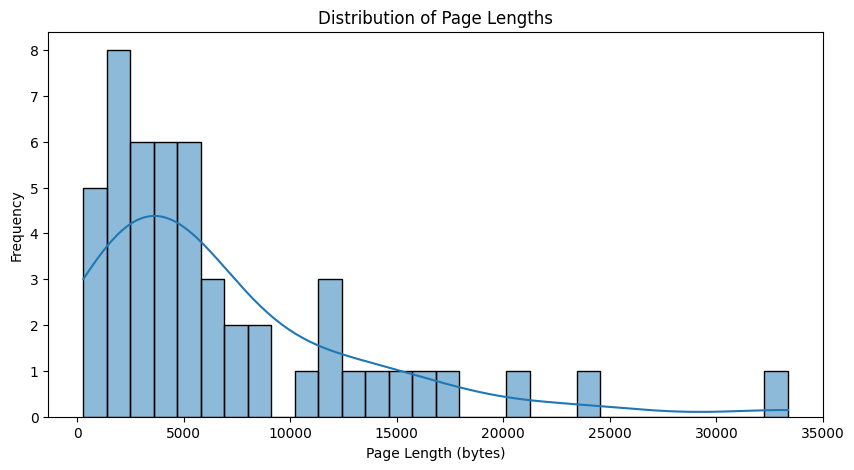

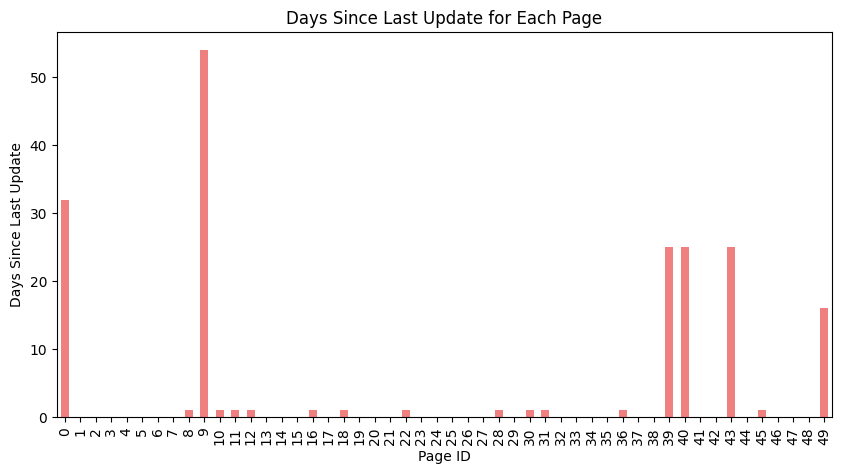

In [60]:
plt.figure(figsize=(10, 5))
sns.histplot(df['length'], bins=30, kde=True)
plt.title('Distribution of Page Lengths')
plt.xlabel('Page Length (bytes)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
df['days_since_last_update'].plot(kind='bar', color='lightcoral')
plt.title('Days Since Last Update for Each Page')
plt.xlabel('Page ID')
plt.ylabel('Days Since Last Update')
plt.show()